In [43]:
import numpy as np
from statistics import mode
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("E:/MKNN/Final/ckd.csv")
X = data.drop('classification', axis=1)
y = data['classification']

# Split the dataset into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset into numpy arrays
train_samples = X_train.to_numpy()
train_labels = y_train.to_numpy()
test_points = X_test.to_numpy()

# Define the range of radius values to test
radius_values = np.arange(200, 240, 5)  # You can adjust the range and step size
best_radius = None
best_accuracy = 0

# Lists to store results
results = []

for radius in radius_values:
    predicted_classes = []  # List to store predicted classes
    outcome = pd.DataFrame(columns=['Predict'])

    start_train = time.time()

    # Pre-compute distances between all test points and train samples
    all_distances = distance.cdist(test_points, train_samples, 'euclidean')

    for j, test_point in enumerate(test_points):
        distances = all_distances[j]

        # Find neighbor points within the radius
        neighbor_indices = np.where(distances <= radius)[0]
        neighbor_distances = distances[neighbor_indices]

        # Assign weights to neighbor points based on inverse distance
        weights = 1 / neighbor_distances
        labels_of_neighbors = train_labels[neighbor_indices]

        # Calculate total weight for each class
        total_weight_1_r1 = np.sum(weights[labels_of_neighbors == 1])
        total_weight_0_r1 = np.sum(weights[labels_of_neighbors == 0])

        # Predict the target class based on higher weight
        predicted_class = 1 if total_weight_1_r1 > total_weight_0_r1 else 0
        predicted_classes.append(predicted_class)

        new_predicted_classes = []

        for i, neighbor_index in enumerate(neighbor_indices):
            neighbor_point = train_samples[neighbor_index]

            # Calculate Euclidean distance between test point and train points in the new region
            new_distances = distance.cdist([neighbor_point], train_samples, 'euclidean')[0]

            # Find new neighbor points within the radius
            new_neighbor_indices = np.where(new_distances <= radius)[0]
            new_neighbor_distances = new_distances[new_neighbor_indices]

            # Assign weights to new neighbor points based on inverse distance
            new_weights = 1 / new_neighbor_distances
            new_labels_of_neighbors = train_labels[new_neighbor_indices]

            # Calculate total weight for each class
            total_weight_1 = np.sum(new_weights[new_labels_of_neighbors == 1])
            total_weight_0 = np.sum(new_weights[new_labels_of_neighbors == 0])

            # Predict the target class based on higher weight in the new region
            new_predicted_class = 1 if total_weight_1 > total_weight_0 else 0
            predicted_classes.append(new_predicted_class)

        end_train = time.time()

        start_test = time.time()
        # Predict the final outcome
        mode_predicted_class = mode(predicted_classes)
        end_test = time.time()
        outcome.loc[j] = mode_predicted_class
        predicted_classes.clear()

    # Calculate accuracy for the current radius
    accuracy = accuracy_score(y_test, outcome['Predict'].astype(int))

    # Calculate training and testing time
    training_time = end_train - start_train
    testing_time = end_test - start_test

    # Update the best radius if the current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_radius = radius
        best_outcome = outcome['Predict'].astype(int)  # Store the best outcome

    # Store results
    results.append({
        "Radius": radius,
        "Accuracy": accuracy,
        "Training Time": training_time,
        "Testing Time": testing_time
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df

C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_7428\1812036102.py:73: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

,Radius,Accuracy,Training Time,Testing Time
0,200,0.6625,0.319146,0.0
1,205,0.6875,0.316154,0.0
2,210,0.6875,0.370009,0.0
3,215,0.7000,0.382974,0.0
4,220,0.7000,0.401927,0.0
5,225,0.7125,0.373997,0.0
6,230,0.7125,0.438825,0.0
7,235,0.7125,0.385966,0.0


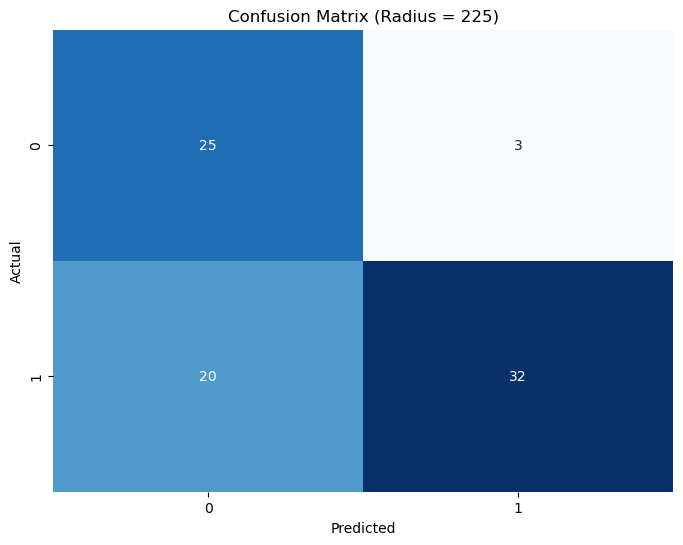

In [44]:
# Generate confusion matrix for the best radius point
conf_matrix = confusion_matrix(y_test, best_outcome)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix (Radius = {best_radius})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
# Calculate TPR, FNR, TNR, FPR
TN, FP, FN, TP = conf_matrix.ravel()

TPR = TP / (TP + FN)
FNR = FN / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (TN + FP)

print("True Positive Rate (TPR):", TPR)
print("False Negative Rate (FNR):", FNR)
print("True Negative Rate (TNR):", TNR)
print("False Positive Rate (FPR):", FPR)

True Positive Rate (TPR): 0.6153846153846154
False Negative Rate (FNR): 0.38461538461538464
True Negative Rate (TNR): 0.8928571428571429
False Positive Rate (FPR): 0.10714285714285714


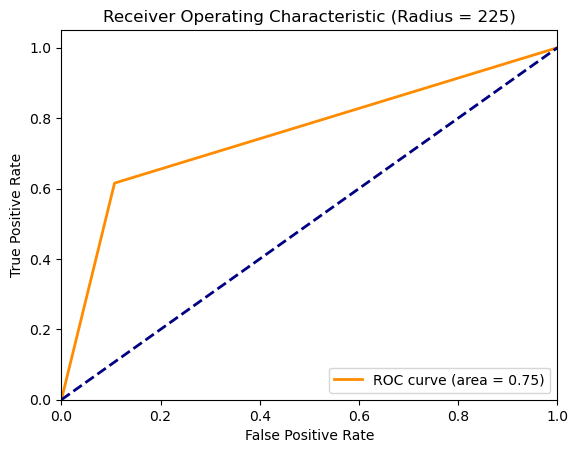

In [46]:
# Generate AUC-ROC curve for the best radius point
y_test_binarized = label_binarize(y_test, classes=[0, 1])
best_outcome_binarized = label_binarize(best_outcome, classes=[0, 1])

fpr, tpr, _ = roc_curve(y_test_binarized, best_outcome_binarized)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (Radius = {best_radius})')
plt.legend(loc='lower right')
plt.show()